In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , classification_report,ConfusionMatrixDisplay



In [21]:
fault_test=pd.read_excel('Fault 1-20  test  (20x960x52).xlsx')
fault_train=pd.read_excel('Fault 1-20  train (20x480x52).xlsx')


,0,1,1.1,1.2,0.25038,3674,4529,9.232,26.889,42.402,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.51,41.258,18.447
0,1,1,1,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
1,2,1,1,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
2,3,1,1,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
3,4,1,1,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
4,5,1,1,6,0.29303,3691.7,4502.2,9.3780,27.111,41.999,...,53.595,28.898,59.107,22.291,38.673,39.890,47.571,47.430,41.308,19.134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,20,1,496,0.20006,3708.5,4497.7,9.2167,27.103,42.336,...,53.749,20.049,59.346,15.976,38.463,42.294,44.981,48.511,41.290,21.141
9995,9996,20,1,497,0.31328,3666.5,4483.6,9.2536,26.704,42.172,...,53.607,30.819,60.733,15.283,38.340,38.185,46.823,48.597,41.941,18.724
9996,9997,20,1,498,0.31186,3674.1,4480.6,9.2912,26.986,42.337,...,53.642,30.958,62.280,14.792,38.143,32.580,45.048,48.664,41.112,16.435
9997,9998,20,1,499,0.30026,3690.1,4519.3,9.2301,26.858,42.376,...,53.440,29.814,59.285,14.388,39.685,36.612,43.100,48.896,41.682,18.685


In [3]:
normal_test=pd.read_excel('Normal 00 test (960x52).xlsx')
normal_train=pd.read_excel('Normal 00 train (480x52).xlsx')

In [5]:
Names = ['Unnamed: 0', 'faultNumber', 'simulationRun', 'sample', 'xmeas_1',
       'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7',
       'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13',
       'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19',
       'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25',
       'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31',
       'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37',
       'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2',
       'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10',
       'xmv_11']

fault_train = pd.read_excel('Fault 1-20  train (20x480x52).xlsx', header=None , names = Names)

In [7]:
Label_train_Faulty=fault_train.iloc[:,1]
Label_train_Normal=normal_train.iloc[:,1]
Label_test_Faulty=fault_test.iloc[:,1]
Label_test_Normal=normal_test.iloc[:,1]

In [8]:
fault_train_main=fault_train.iloc[:,4:]
normal_train_main=normal_train.iloc[:,4:]
fault_test_main=fault_test.iloc[:,4:]
normal_test_main=normal_test.iloc[:,4:]

In [9]:
train_concat=pd.concat([fault_train_main,normal_train_main])
test_concat=pd.concat([fault_test_main,normal_test_main])


In [10]:
label_train=pd.concat([Label_train_Faulty,Label_train_Normal])
label_test=pd.concat([Label_test_Faulty,Label_test_Normal])


In [11]:
scaler = StandardScaler()
Data_train = scaler.fit_transform(train_concat)
Data_test = scaler.fit_transform(test_concat)

In [12]:
svm_classifier=svm.SVC(kernel='linear',C=8,class_weight='balanced',gamma='auto')
svm_classifier.fit(Data_train,label_train)

SVC(C=8, class_weight='balanced', gamma='auto', kernel='linear')

In [15]:
label_prediction=svm_classifier.predict(Data_test)
report=classification_report(label_test,label_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.06      0.01      0.01       960
           1       0.87      0.82      0.84       960
           2       0.95      0.82      0.88       960
           3       0.13      0.17      0.15       960
           4       0.66      0.83      0.73       960
           5       0.86      0.82      0.84       960
           6       1.00      0.83      0.91       960
           7       1.00      0.77      0.87       960
           8       0.05      0.08      0.07       960
           9       0.07      0.01      0.01       960
          10       0.24      0.04      0.06       960
          11       0.11      0.02      0.03       960
          12       0.09      0.67      0.16       960
          13       0.19      0.31      0.24       960
          14       0.03      0.01      0.01       960
          15       0.09      0.00      0.01       960
          16       0.10      0.05      0.06       960
          17       0.67    

<Figure size 1200x1000 with 0 Axes>

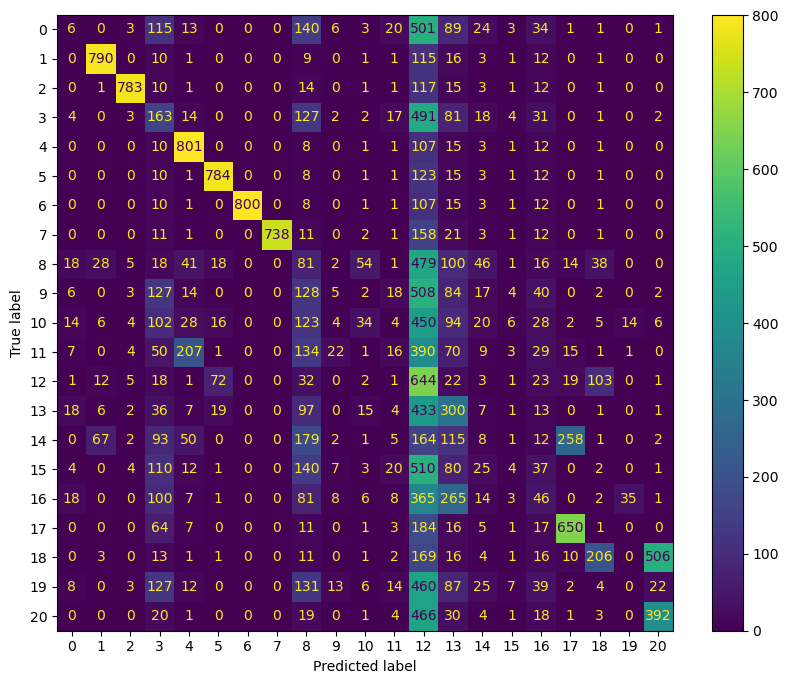

In [20]:
conf_matrix=confusion_matrix(label_test,label_prediction)
disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=svm_classifier.classes_)
plt.figure(figsize=(12.0 , 10.0))
plt.rcParams['figure.figsize']=(10,8)

disp.plot()